# Klasyfikacja i regresja przy pomocy metod SVM

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm, datasets
from matplotlib import style
style.use("ggplot")

Biblioteka ułatwiająca rysowanie granic decyzyjnych ( *pip install mlxtend* ):

In [2]:
from mlxtend.plotting import plot_decision_regions

### Prosty przykład klasyfikacji 

In [20]:
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

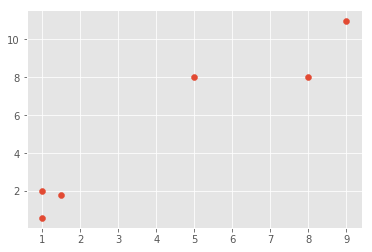

In [4]:
plt.scatter(x, y)
plt.show()

In [21]:
X = np.array([[1,2],[5,8],[1.5,1.8],[8,8],[1,0.6],[9,11]])
y = [0,1,0,1,0,1]

In [22]:
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
def plot_hyperplane(clf):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(0, 10)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the support vectors
    b = clf.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = clf.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])

    # plot the line, the points, and the nearest vectors to the plane
    #plt.plot(xx, yy, 'k-')
    #plt.plot(xx, yy_down, 'k--')
    #plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    plt.axis('tight')
    plt.show()
    
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

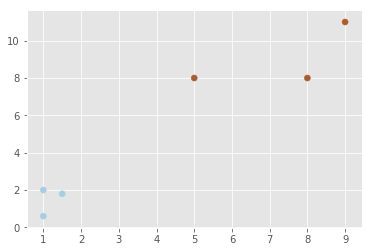

In [23]:
plot_hyperplane(clf)

### Klasyfikacja danych ze zbioru 'fourclass'

In [9]:
df = pd.read_csv('data/dataset1.csv')
X = df[['f1','f2']].as_matrix()
y = df['l'].as_matrix()
print(X.shape)
print(y.shape)

(99, 2)
(99,)


In [14]:
#clf = svm.SVC(kernel='linear', C=1.0)
#clf = svm.SVC(kernel='poly', degree=3, C=1.0)
clf = svm.SVC(kernel='rbf', gamma=99.7, C=1.0)
clf.fit(X,y)
# TODO: Podzielić na zbiór treningowy i testowy
clf.score(X,y)

1.0

In [ ]:
plot_decision_regions(X=X, 
                      y=y,
                      clf=clf, 
                      legend=2)

#plt.xlabel(X.columns[0], size=14)
#plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

### Porównanie różnych typów kerneli
TODO: Poeksperymentować z różnymi wartościami C, gamma i degree.

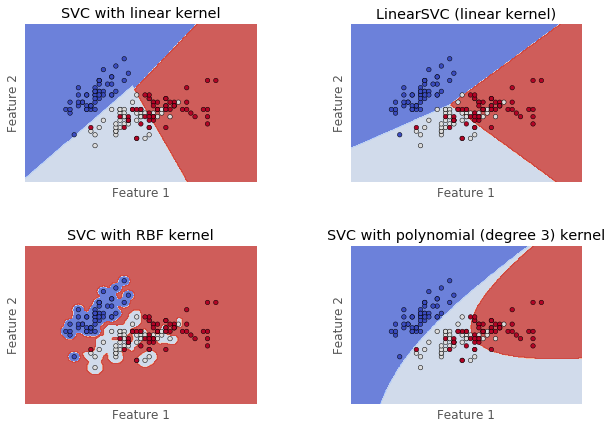

In [13]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=99.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(10, 7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()